# 과소적합 (underfitting)

우리가 공부했던 과적합을 실험적으로 구현해보겠습니다.  
이진분류에서 다뤘던 신경망과 IMDB 데이터셋으로요.  
![](https://drive.google.com/thumbnail?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3&sz=s4000)

---
앞에서처럼 훈련 데이터를 직접 나눌수도 있지만 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)메서드에서 validation_split 설정으로 편리하게 나눠서 학습시킬수 있습니다.  
0과 1사의 값으로 검증데이터의 비율을 지정해줍니다.  
입력 뉴런의 개수는 데이터가 입력될때 결정됩니다.  
`input_shape`을 정의하지 않은 경우는 첫번째 데이터가 입력될때 그 데이터의 피처수로 입력 뉴런수가 결정이 됩니다.

In [1]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

original_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")])

original_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

original_hist = original_model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6952 - loss: 0.5965 - val_accuracy: 0.8409 - val_loss: 0.4104
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8926 - loss: 0.3388 - val_accuracy: 0.8606 - val_loss: 0.3427
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9194 - loss: 0.2460 - val_accuracy: 0.8905 - val_loss: 0.2805
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9350 - loss: 0.1951 - val_accuracy: 0.8834 - val_loss: 0.2931
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9479 - loss: 0.1635 - val_accuracy: 0.8886 - val_loss: 0.2776
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9580 - loss: 0.1359 - val_accuracy: 0.8749 - val_loss: 0.3189
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9660 - loss: 0.1158 - val_accuracy: 0.8846 - val_loss: 0.3006
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9710 - loss: 0.1040 - val_accuracy: 0.8733 - v

은닉층의 뉴런수를 16에서 4로 줄인 작은 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1ej6ZYCbe5_Lc8HNAVxcpEkkfV_9tUO8a&sz=s4000)

In [2]:
smaller_model = keras.Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

smaller_model_hist = smaller_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6924 - loss: 0.6235 - val_accuracy: 0.8344 - val_loss: 0.4819
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8795 - loss: 0.4331 - val_accuracy: 0.8772 - val_loss: 0.3885
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9035 - loss: 0.3427 - val_accuracy: 0.8813 - val_loss: 0.3390
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9222 - loss: 0.2746 - val_accuracy: 0.8835 - val_loss: 0.3114
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9322 - loss: 0.2387 - val_accuracy: 0.8892 - val_loss: 0.2907
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9412 - loss: 0.2010 - val_accuracy: 0.8862 - val_loss: 0.2860
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9472 - loss: 0.1796 - val_accuracy: 0.8909 - val_loss: 0.2760
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9556 - loss: 0.1576 - val_accuracy: 0.8891 - v

작은 모델의 파라미터 개수가 중간모델의 4분의 1밖에 안됩니다.  
훈련데이터의 정보를 저장할 수 있는 용량이 4분의 1밖에 안된다는 뜻이지요.

In [3]:
original_model.summary()
smaller_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,060 (312.74 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,031 (156.38 KB)

훈련데이터에 대해서는 중간 신경망의 손실함수값이 작은 신경망보다 빠르게 감소합니다.  
중간 신경망의 메모리가 더 커서 훈련 데이터의 정보를 빠르고 많이 습득하기 때문이겠죠.

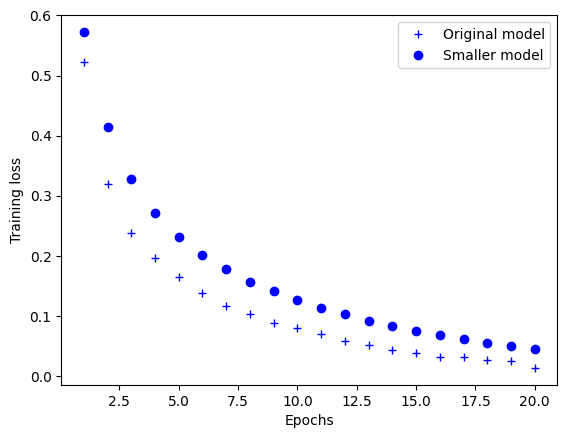

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 작은 신경망에서 과적합이 더 늦게 그리고 더 완만히 진행됩니다.

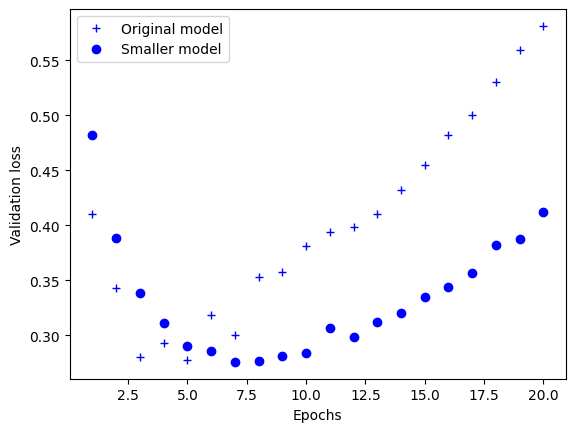

In [5]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 과대적합 (overfitting)

은닉층의 뉴런수를 16에서 512로 늘린 큰 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1q0daZATKf8vTpHRtPelk0bcu9_CcgbLz&sz=s4000)

In [6]:
bigger_model = keras.Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")])

bigger_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bigger_model_hist = bigger_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6341 - loss: 0.6485 - val_accuracy: 0.8551 - val_loss: 0.3619
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8644 - loss: 0.3428 - val_accuracy: 0.8807 - val_loss: 0.2858
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9039 - loss: 0.2432 - val_accuracy: 0.8315 - val_loss: 0.4109
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9247 - loss: 0.1984 - val_accuracy: 0.8883 - val_loss: 0.2736
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9566 - loss: 0.1263 - val_accuracy: 0.8881 - val_loss: 0.3129
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9555 - loss: 0.1216 - val_accuracy: 0.8437 - val_loss: 0.4423
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9741 - loss: 0.0764 - val_accuracy: 0.8850 - val_loss: 0.3438
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9868 - loss: 0.0477 - val_accuracy: 0.8834 - v

큰 모델의 파라미터 개수가 중간모델의 무려 33배나 됩니다.  
기억 용량도 33배라는 뜻이지요.

In [7]:
original_model.summary()
bigger_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,767,364 (41.07 MB)

 Trainable params: 5,383,681 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,383,683 (20.54 MB)

훈련데이터에 대해서는 큰 신경망의 손실함수값이 빠르게 0으로 떨어집니다.  
그런데 학습 중간에 튀는 불안정한 현상을 볼수 있네요.

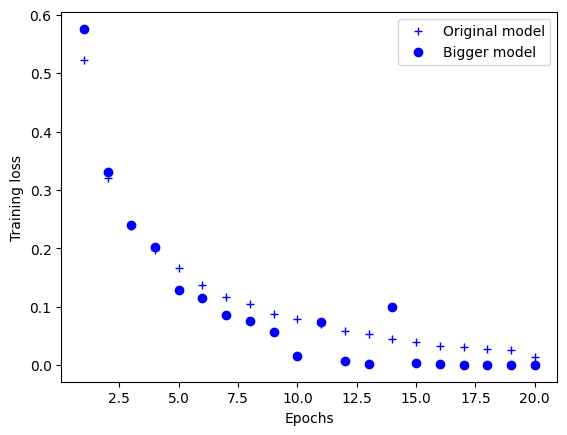

In [8]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 큰 신경망에서 과적합이 더 빨리 그리고 더 가파르게 그리고 더 불안정하게 진행됩니다.

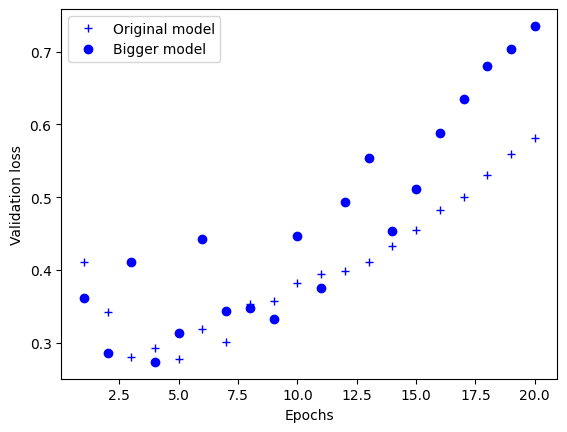

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^2$-규제 ($L^2$-regularization)

우리는 $L^2$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^2$ 페널티 ${1 \over 2} \times \lambda \times \sum w_{i,j}^2$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^2$-페널티의 그레디언트의 반대방향 업데이트는 신경망의 가중치를 비슷하게 만드려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [10]:
from tensorflow.keras import regularizers

l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model_hist = l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6828 - loss: 0.7055 - val_accuracy: 0.8603 - val_loss: 0.5073
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8783 - loss: 0.4583 - val_accuracy: 0.8754 - val_loss: 0.4108
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9119 - loss: 0.3544 - val_accuracy: 0.8847 - val_loss: 0.3731
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9217 - loss: 0.3084 - val_accuracy: 0.8761 - val_loss: 0.3774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9335 - loss: 0.2800 - val_accuracy: 0.8855 - val_loss: 0.3665
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9366 - loss: 0.2673 - val_accuracy: 0.8820 - val_loss: 0.3720
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9458 - loss: 0.2467 - val_accuracy: 0.8822 - val_loss: 0.3690
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9465 - loss: 0.2400 - val_accuracy: 0.8838 - v

$L^2$-규제된 신경망은 학습데이터의 손실함수값이 일정 수준 이하로는 내려오질 않네요.

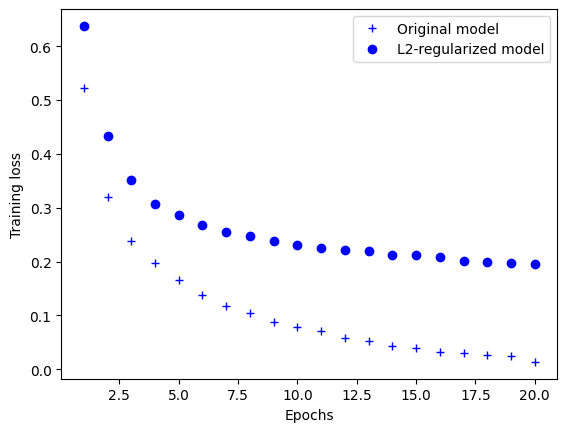

In [11]:
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

$L^2$-규제된 신경망은 과적합이 억제되고 있습니다.

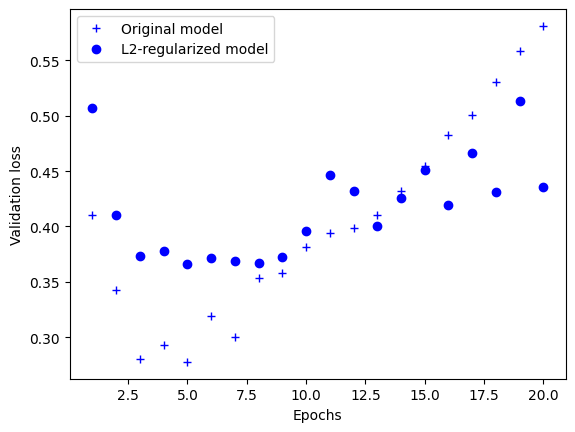

In [12]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습1] (10분) 가중치 감소 계수 $\lambda$를 약하게 $0.0002$로 잡은 모델과 강하게 $0.02$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

In [13]:
weak_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(1, activation="sigmoid")])

weak_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

weak_l2_model_hist = weak_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,verbose = 0)

weak_l2_model_val_loss = weak_l2_model_hist.history['val_loss']

In [14]:
strong_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(1, activation="sigmoid")])

strong_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

strong_l2_model_hist = strong_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,verbose = 0)

strong_l2_model_val_loss = strong_l2_model_hist.history['val_loss']

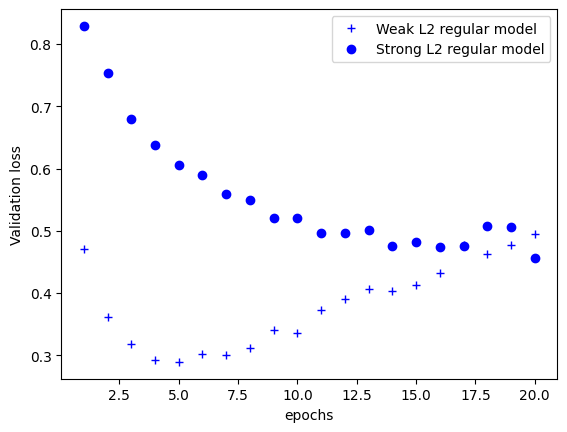

In [15]:
plt.plot(epochs,weak_l2_model_val_loss,'b+',label='Weak L2 regular model')
plt.plot(epochs,strong_l2_model_val_loss,'bo',label='Strong L2 regular model')

plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^1$-규제 ($L^1$-regularization)

우리는 $L^1$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^1$ 페널티 ${1 \over 2} \times \lambda \times \sum |w_{i,j}|$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^1$-페널티의 그레디언트의 반대방향 업데이트는 절대값이 작은 가중치를 아예 없애버리려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [ ]:
l1_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")])

l1_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l1_model_hist = l1_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**[실습2] (5분) 기본 신경망과 $L^1$-규제된 신경망의 훈련데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

**[실습3] (5분) 기본 신경망과 $L^1$-규제된 신경망의 검증데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

# Dropout

이전에 공부한 dropout을 케라스로 구현하겠습니다.  
dropout은 학습 데이터가 들어올때마다 무작위로 뉴런을 삭제해서 신호전달을 차단하는 기법입니다.  
이상해보이지만 과적합 억제를 위해 매우 많이 사용되는 기법입니다.  
케라스에는 [Dropout층](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)이 구현되어 있습니다.  
몇 퍼센트를 삭제할지 인수로 지정해 줍니다.  
![](https://drive.google.com/thumbnail?id=1wPtyMrgWXGxiJp0YofJPGlYDDE94uoX-&sz=s4000)

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")])

dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_model_hist = dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

plot_model(dropout_model, show_shapes=True, show_layer_activations=True)

dropout층이 추가된 신경망은 학습데이터의 손실함수값이 천천히 떨어지네요.

In [ ]:
dropout_model_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

dropout층이 추가된 신경망은 과적합이 늦게 시작되고 더 완만하게 진행됩니다.

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습4] (10분) dropout 비율을 약하게 $0.2$로 잡은 모델과 강하게 $0.8$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**